# Academic Performance

This is a study notebook aimed to work on a simple regression task.

## Imports

In [24]:
import kagglehub
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

## Load Data

In [82]:
path = kagglehub.dataset_download("jayaantanaath/student-habits-vs-academic-performance")
data = pd.read_csv(path + "/student_habits_performance.csv")

## Data Overview

In [3]:
data.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [6]:
cat_columns = [
    "gender", "part_time_job", "diet_quality",
    "parental_education_level", "internet_quality",
    "extracurricular_participation"
]

for column in cat_columns:
    print(data[column].value_counts(), "\n")

gender
Female    481
Male      477
Other      42
Name: count, dtype: int64 

part_time_job
No     785
Yes    215
Name: count, dtype: int64 

diet_quality
Fair    437
Good    378
Poor    185
Name: count, dtype: int64 

parental_education_level
High School    392
Bachelor       350
Master         167
Name: count, dtype: int64 

internet_quality
Good       447
Average    391
Poor       162
Name: count, dtype: int64 

extracurricular_participation
No     682
Yes    318
Name: count, dtype: int64 



The columns `internet_quality`, `parental_education_level`, `diet_quality`, `part_time_job` and `extracurricular_participation` will be handled as ordinal. The others as one hot encoded.

In [ ]:
num_columns = data.select_dtypes(include=np.number).columns.tolist()

In [7]:
data.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


## Data Visualization

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'study_hours_per_day'}>,
        <Axes: title={'center': 'social_media_hours'}>],
       [<Axes: title={'center': 'netflix_hours'}>,
        <Axes: title={'center': 'attendance_percentage'}>,
        <Axes: title={'center': 'sleep_hours'}>],
       [<Axes: title={'center': 'exercise_frequency'}>,
        <Axes: title={'center': 'mental_health_rating'}>,
        <Axes: title={'center': 'exam_score'}>]], dtype=object)

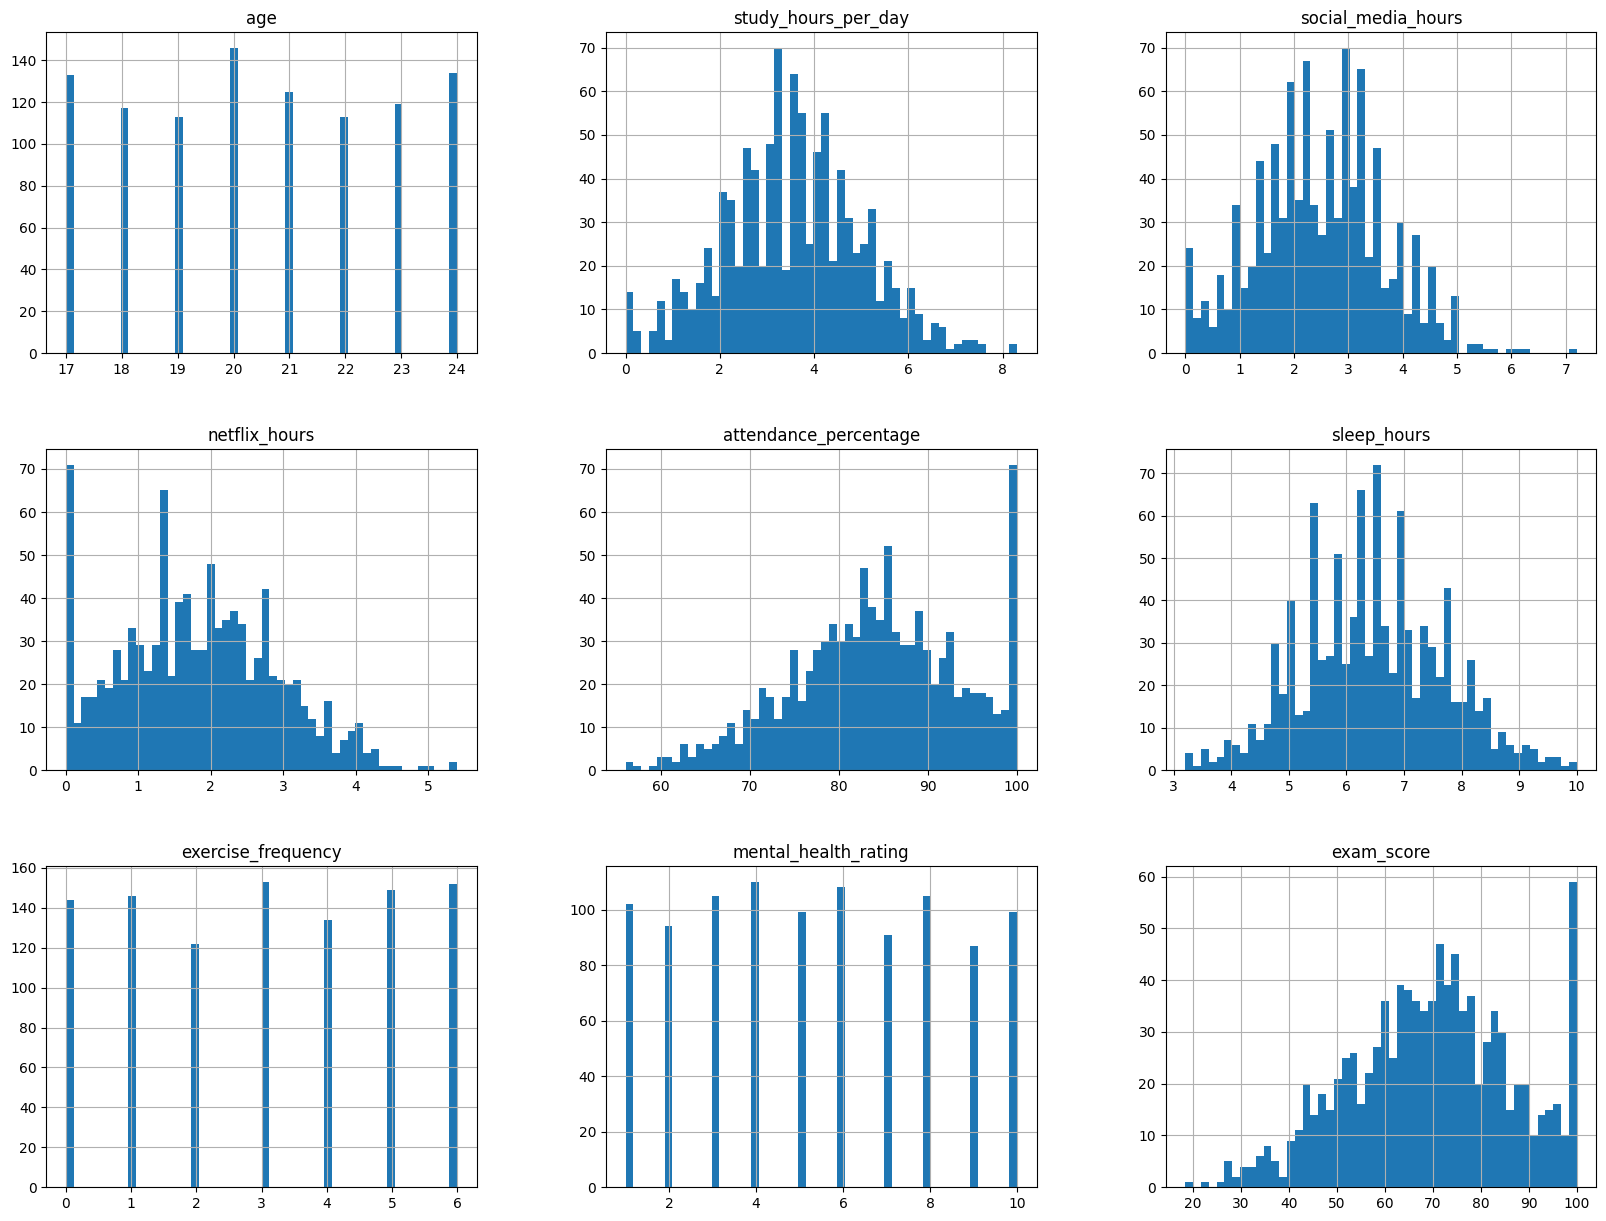

In [8]:
data.hist(bins=50, figsize=(20, 15))

In [13]:
corr_matrix = data[num_columns].corr()
print(corr_matrix["exam_score"].sort_values(ascending=False))

exam_score               1.000000
study_hours_per_day      0.825419
mental_health_rating     0.321523
exercise_frequency       0.160107
sleep_hours              0.121683
attendance_percentage    0.089836
age                     -0.008907
social_media_hours      -0.166733
netflix_hours           -0.171779
Name: exam_score, dtype: float64


The columns `study_hours_per_day` and `mental_health_rating` seem to have a large impact. `age` and `attendance_percentage` on the other hand does not seem that important.

array([[<Axes: xlabel='exam_score', ylabel='exam_score'>,
        <Axes: xlabel='study_hours_per_day', ylabel='exam_score'>,
        <Axes: xlabel='mental_health_rating', ylabel='exam_score'>,
        <Axes: xlabel='netflix_hours', ylabel='exam_score'>],
       [<Axes: xlabel='exam_score', ylabel='study_hours_per_day'>,
        <Axes: xlabel='study_hours_per_day', ylabel='study_hours_per_day'>,
        <Axes: xlabel='mental_health_rating', ylabel='study_hours_per_day'>,
        <Axes: xlabel='netflix_hours', ylabel='study_hours_per_day'>],
       [<Axes: xlabel='exam_score', ylabel='mental_health_rating'>,
        <Axes: xlabel='study_hours_per_day', ylabel='mental_health_rating'>,
        <Axes: xlabel='mental_health_rating', ylabel='mental_health_rating'>,
        <Axes: xlabel='netflix_hours', ylabel='mental_health_rating'>],
       [<Axes: xlabel='exam_score', ylabel='netflix_hours'>,
        <Axes: xlabel='study_hours_per_day', ylabel='netflix_hours'>,
        <Axes: xlabel='menta

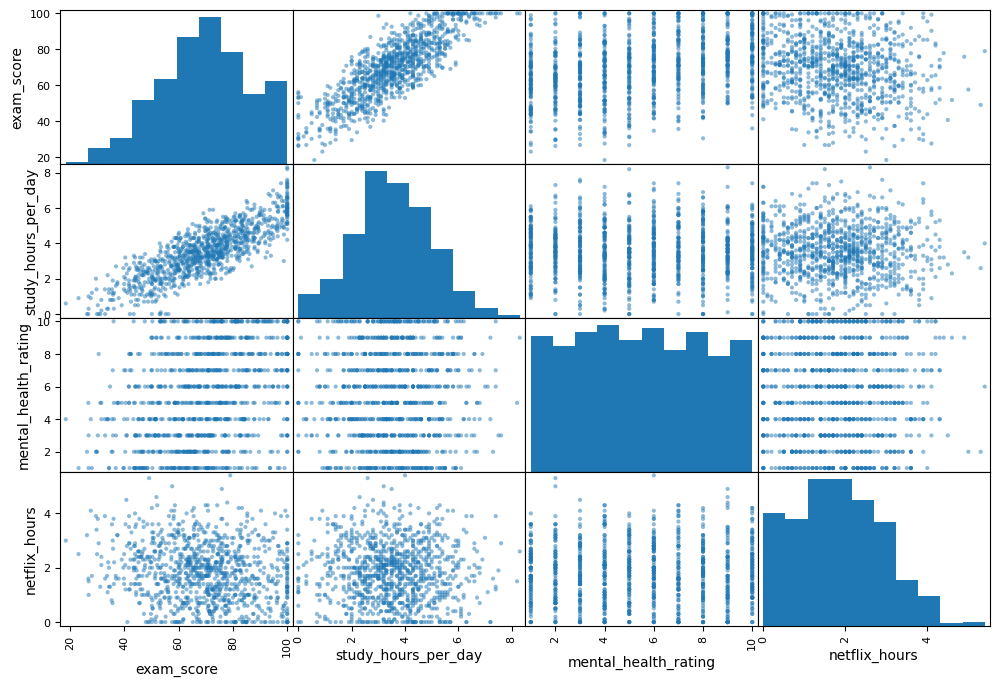

In [16]:
chosen_attribs = ["exam_score", "study_hours_per_day", "mental_health_rating", "netflix_hours"]

scatter_matrix(data[chosen_attribs], figsize=(12, 8))

## Data Preprocessing

In [96]:
# The student id probably has no influence
# The other two have very low correlation with exam score
data_drop = data.drop(["student_id", "age"], axis=1)

In [108]:
train_set, test_set = train_test_split(data_drop, test_size=0.2, random_state=42)

train_data = train_set.drop("exam_score", axis=1)
train_labels = train_set["exam_score"].copy()

### Numerical Columns

In [109]:
# Numerical preprocessing
num_columns = train_data.select_dtypes(include=np.number).columns.tolist()

In [122]:
study_index, social_media_index, netflix_index = 1, 2, 3

class CombineAttributes(BaseEstimator, TransformerMixin):
    def fit(self, x, y=None):
        return self
    def transform(self, x, y=None):
        screen_hours = x[:, social_media_index] + x[:, netflix_index]
        study_to_screen_ratio = x[:, study_index] / screen_hours
        return np.c_[x, screen_hours, study_to_screen_ratio]

In [123]:
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
    ("attribute_adder", CombineAttributes()),
    ("std_scaler", StandardScaler())
])

### Categorical columns

In [112]:
ordinal_columns = [
    "part_time_job", "diet_quality", "parental_education_level",
    "internet_quality", "extracurricular_participation"
]

ordinal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("ordinal", OrdinalEncoder())
])

In [113]:
nominal_columns = ["gender"]

nominal_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("nominal", OneHotEncoder())
])

### Combined

In [124]:
pre_pipeline = ColumnTransformer([
    ("numerical", num_pipeline, num_columns),
    ("ordinal", ordinal_pipeline, ordinal_columns),
    ("nominal", nominal_pipeline, nominal_columns)
])

train_prepared = pre_pipeline.fit_transform(train_data)

## Train models

In [104]:
from sklearn.model_selection import cross_val_score

In [134]:
def train_and_display_scores(reg_model, train_x, train_y):
    scores = cross_val_score(reg_model, train_x, train_y, scoring="neg_root_mean_squared_error", cv=10)
    scores = -scores
    print("Mean scores: ", round(scores.mean(), 4))
    print("Standard Deviation: ", round(scores.std(), 4))

### Linear Regression

In [135]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
train_and_display_scores(linear_reg, train_prepared, train_labels)

Mean scores:  5.4131
Standard Deviation:  0.6077


In [136]:
linear_reg = LinearRegression()
train_and_display_scores(linear_reg, train_prepared, train_labels)

Mean scores:  5.4131
Standard Deviation:  0.6077


### Decision Tree

In [137]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
train_and_display_scores(tree_reg, train_prepared, train_labels)

Mean scores:  9.4203
Standard Deviation:  0.7826


### Random Forrest

In [138]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_jobs=-1)
train_and_display_scores(forest_reg, train_prepared, train_labels)

Mean scores:  6.4613
Standard Deviation:  0.5801


### Voting Regressor

In [140]:
from sklearn.ensemble import VotingRegressor, GradientBoostingRegressor

gradient_reg = GradientBoostingRegressor(random_state=42)
voting_reg = VotingRegressor(estimators=[
    ('gr', gradient_reg),
    ('rf', forest_reg),
    ('lr', linear_reg)
])

train_and_display_scores(voting_reg, train_prepared, train_labels)

Mean scores:  5.54
Standard Deviation:  0.5555


### Lasso

In [141]:
from sklearn.linear_model import Lasso

las_reg = Lasso(alpha=0.1)
train_and_display_scores(las_reg, train_prepared, train_labels)

Mean scores:  5.3944
Standard Deviation:  0.6099


## Elastic Net

In [142]:
from sklearn.linear_model import ElasticNet

el_reg = ElasticNet()
train_and_display_scores(el_reg, train_prepared, train_labels)

Mean scores:  8.0969
Standard Deviation:  0.5804


## Hyperparameter Tuning

In [146]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {"n_estimators": [70, 80, 90, 100, 200, 300], "max_features": [8, 12]}
]

forest_reg = RandomForestRegressor(n_jobs=-1)

grid_search = GridSearchCV(
    forest_reg, param_grid, cv=5, scoring="neg_root_mean_squared_error",
    return_train_score=True
)

grid_search.fit(train_prepared, train_labels)

,estimator,RandomForestR...sor(n_jobs=-1)
,param_grid,"[{'max_features': [8, 12], 'n_estimators': [70, 80, ...]}]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,n_estimators,300


In [147]:
scores = grid_search.cv_results_
for score, params in zip(scores["mean_test_score"], scores["params"]):
    print(-score, params)

6.615967427057032 {'max_features': 8, 'n_estimators': 70}
6.54306851267725 {'max_features': 8, 'n_estimators': 80}
6.619903157053983 {'max_features': 8, 'n_estimators': 90}
6.543569030484707 {'max_features': 8, 'n_estimators': 100}
6.570925377659762 {'max_features': 8, 'n_estimators': 200}
6.568740518535745 {'max_features': 8, 'n_estimators': 300}
6.5063845186017515 {'max_features': 12, 'n_estimators': 70}
6.482058377106543 {'max_features': 12, 'n_estimators': 80}
6.477800343118372 {'max_features': 12, 'n_estimators': 90}
6.5236578009532336 {'max_features': 12, 'n_estimators': 100}
6.462912762712927 {'max_features': 12, 'n_estimators': 200}
6.442420869277572 {'max_features': 12, 'n_estimators': 300}


## Support Vector Machine

In [164]:
from sklearn.svm import SVR

svr_reg = SVR()

grid_params = [
    {'kernel': ['linear'], 'C': [1.0, 5.0]},
    {'kernel': ['rbf'], 'C': [200.0], 'gamma': ['auto', 0.009]}
]

grid_search = GridSearchCV(
    svr_reg, grid_params, cv=5, scoring="neg_root_mean_squared_error",
    return_train_score=True
)

grid_search.fit(train_prepared, train_labels)

,estimator,SVR()
,param_grid,"[{'C': [1.0, 5.0], 'kernel': ['linear']}, {'C': [200.0], 'gamma': ['auto', 0.009], 'kernel': ['rbf']}]"
,scoring,'neg_root_mean_squared_error'
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,True
,kernel,'rbf'


In [165]:
scores = grid_search.cv_results_
for score, params in zip(scores["mean_test_score"], scores["params"]):
    print(-score, params)

5.486633987381117 {'C': 1.0, 'kernel': 'linear'}
5.494390531724038 {'C': 5.0, 'kernel': 'linear'}
7.0948194871660535 {'C': 200.0, 'gamma': 'auto', 'kernel': 'rbf'}
5.481233676696948 {'C': 200.0, 'gamma': 0.009, 'kernel': 'rbf'}
